# Installation 
#### Anaconda 3-4.2.0 (or higher)
#### Create virtual environment >> conda create -n yourenvname
#### Activate virtual environment >>  conda activate yourenvname
#### Install torchvision (Installs pytorch too) >> conda install -c pytorch torchvision
#### Open Jupyter notebook >> jupyter notebook

In [323]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
import cv2 as cv
import glob
# from skimage import io
image_size = 56

## Input Transformation
#### Convert the Numpy arrays to PyTorch tensors and normalize input

In [324]:
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [325]:
my_transform = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(), transforms.Resize((image_size,image_size)),transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

## Loading dataset
#### This is a built-in demo. Creating your own custom dataloader is discussed later

In [380]:
# trainset = datasets.MNIST('~/Documents/Sem9/TA-COL780/Pytorch_tutorial/', download=True, train=True, transform=transform)
# testset = datasets.MNIST('~/Documents/Sem9/TA-COL780/Pytorch_tutorial/', download=True, train=False, transform=transform2)
trainloader = torch.utils.data.DataLoader(custom_training_dataset, batch_size=30, shuffle=True)
print(len(custom_training_dataset))
print(len(trainloader))
testloader = torch.utils.data.DataLoader(custom_testing_dataset, batch_size=208, shuffle=True)
print(len(custom_testing_dataset))
print(len(testloader))
classes = ('0','1','2','3')

4756
159
208
1


In [386]:
dataiter = iter(trainloader)
n = dataiter.next()
images = n['image']
labels = n['label']

print(images.shape)
print(labels.shape)

torch.Size([30, 1, 56, 56])
torch.Size([30])


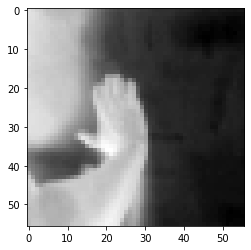

In [387]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');  

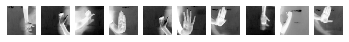

In [388]:
figure = plt.figure()
num_of_images = 10
for index in range(1, num_of_images+1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

torch.Size([208, 1, 56, 56])
torch.Size([208])


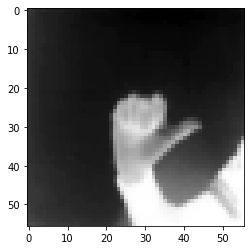

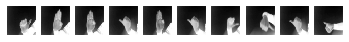

In [389]:
dataiter = iter(testloader)
n = dataiter.next()
images = n['image']
labels = n['label']

print(images.shape)
print(labels.shape)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');  
figure = plt.figure()
num_of_images = 10
for index in range(1, num_of_images+1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Constructing the network

In [397]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 12 * 12, 240)  
        self.fc2 = nn.Linear(240, 96)
        self.fc3 = nn.Linear(96, 4)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
#         print("inside forward")
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
# print(net)

In [398]:
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2304, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=96, bias=True)
  (fc3): Linear(in_features=96, out_features=4, bias=True)
)

In [399]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training the network

[1,    75] loss: 1.314
[1,   150] loss: 1.147
[1,     1] loss_val: 1.144
[2,    75] loss: 1.082
[2,   150] loss: 1.053
[2,     1] loss_val: 1.092
[3,    75] loss: 1.028
[3,   150] loss: 0.975
[3,     1] loss_val: 1.169
[4,    75] loss: 0.859
[4,   150] loss: 0.800
[4,     1] loss_val: 1.297
[5,    75] loss: 0.714
[5,   150] loss: 0.587
[5,     1] loss_val: 1.730
Finished Training


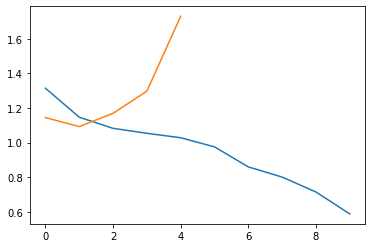

In [400]:
mini_batch = 75
mini_batch_loss = 1
loss_values = []
loss_values_val = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    running_loss_val =0.0
#     print(len(trainloader))
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs_train = data['image']
        labels_train = data['label']
#         print(i)
#         print(data['image'])

        # make the parameter gradients zero
        optimizer.zero_grad()

        # forward + backward + optimize
#         print("before for")
        outputs_train = net(inputs_train)
#         print("after for")
        loss_train = criterion(outputs_train, labels_train)
        loss_train.backward()
        optimizer.step()

        # print statistics
        running_loss += loss_train.item()
        if i % mini_batch == mini_batch-1:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / mini_batch))
            loss_values.append(running_loss/mini_batch)
            running_loss = 0.0
         
        
    for i, data in enumerate(testloader,0):
        inputs_val = data['image']
        labels_val = data['label']

        outputs_val = net(inputs_val)
        loss_val = criterion(outputs_val, labels_val)

        # print statistics
        running_loss_val += loss_val.item()
        if i % mini_batch_loss == mini_batch_loss-1:    # print every 200 mini-batches
            print('[%d, %5d] loss_val: %.3f' %
                  (epoch + 1, i + 1, running_loss_val / mini_batch_loss))
            loss_values_val.append(running_loss_val/mini_batch_loss)
            running_loss_val = 0.0
        
        
plt.plot(loss_values)
plt.plot(loss_values_val)

print('Finished Training')

## Checking Train and Test accuracies

In [401]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images = data['image']
        labels = data['label']
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the train images: 80 %


In [402]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images = data['image']
        labels = data['label']
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 47 %


## Making your own custom Dataloader

In [319]:
class customDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.label = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.label.iloc[idx, 0])
#         print(img_name)
        image = cv.imread(img_name)
#         print(self.label)
        labels = self.label.iloc[idx, 1]
#         print(labels)
        labels = np.array(labels)
#         print(labels[0])
        
#         labels = labels.astype('float').reshape(-1, 1)
#         print(labels[0])
        sample = {'image': image, 'label': labels}

        if sample['image'] is not None:
            if self.transform:
                sample['image'] = self.transform(sample['image'])

        return sample

In [320]:
#CUSTOM TRAIN DATASET
# custom_dataset = customDataset(csv_file='./dataset/labels.csv',root_dir='./dataset/images/',transform=transforms.Compose([Rescale(256),ToTensor()]))
custom_training_dataset = []
temp = customDataset(csv_file='./dataset/train/labels.csv',root_dir='./dataset/train/images/',transform=my_transform)

images = glob.glob('./dataset/train/images/*.jpg')
images.sort()
# count = []
for i in range(len(temp)):
    sample = temp[i]
#     print(sample.keys())
    if sample['image'] is not None:
        custom_training_dataset.append(sample)
#         print(i, sample['image'].shape, sample['label'].shape, sample['label'][0][0])
    else:
        print(i)
#         count.append(i)
#     print(sample)
# print(count)

420
1086
1583


In [321]:
#CUSTOM TEST DATASET
# custom_dataset = customDataset(csv_file='./dataset/labels.csv',root_dir='./dataset/images/',transform=transforms.Compose([Rescale(256),ToTensor()]))
custom_testing_dataset = []
temp = customDataset(csv_file='./dataset/test/labels.csv',root_dir='./dataset/test/images/',transform=my_transform)

images = glob.glob('./dataset/test/images/*.jpg')
images.sort()
# count = []
for i in range(len(temp)):
    sample = temp[i]
#     print(sample.keys())
    if sample['image'] is not None:
        custom_testing_dataset.append(sample)
#         print(i, sample['image'].shape, sample['label'].shape, sample['label'][0][0])
    else:
        print(i)
#         count.append(i)
#     print(sample)
# print(count)

In [322]:
# videos = glob.glob('./Videos/*')
# print(videos)
# for i in videos:
#     path = i
#     vid=cv.VideoCapture(path)
#     count=0
#     print(i)
#     folder_name = path.split('.')[1].split('/')[2]
#     print(folder_name)
#     if os.path.exists('./frames/'+folder_name):
#         continue
#     os.makedirs('./frames/'+folder_name)
#     success=1
#     while success:
#         print(count)
#         success, image=vid.read()
#         cv.imwrite("./frames/"+folder_name+"/"+folder_name+"_%d.jpg" %count, image)
#         count+=1


In [96]:
# Class for transformation, not required now 

class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transforms.Resize((new_h, new_w), interpolation=2)
#         img = transforms.resize((new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
#         landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'label': label}

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'label': label}
